# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cityObjs = []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    #print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cityName = weather_json['name']
        cityNum = cities.index(city)
        # latitude
        cityLat = weather_json['coord']['lat']
        # longitude
        cityLon = weather_json['coord']['lon']
        # max temp
        maxTemp = weather_json['main']['temp_max']
        maxTemp = maxTemp * 1.8 - 459.67
        # humidity
        humidity = weather_json['main']['humidity']
        # cloudiness
        cloudiness = weather_json['clouds']['all']
        # wind speed
        speed = weather_json['wind']['speed']
        # date
        date = weather_json['dt']
        cityObjs.append({
            'Name' : cityName,
            'Latitude' : cityLat,
            'Longitude' : cityLon,
            'Maximum Temperature' : maxTemp,
            'Humidity' : humidity,
            'Cloudiness' : cloudiness,
            'Wind Speed' : speed,
            'Date' : date
        })
        pprint(f"Getting info for {cityName}")
    except KeyError:
        pprint("No records found")

'Getting info for Cape Town'
'Getting info for Pevek'
'Getting info for Tuatapere'
'Getting info for Chifeng'
'Getting info for Srednekolymsk'
'Getting info for Crestview'
'Getting info for Southbridge'
'Getting info for Port Alfred'
'Getting info for Garissa'
'Getting info for Klaksvík'
'Getting info for Mar del Plata'
'Getting info for Tasiilaq'
'Getting info for Hailey'
'Getting info for Geraldton'
'Getting info for Antalaha'
'No records found'
'Getting info for Hithadhoo'
'Getting info for Punta Arenas'
'Getting info for Avarua'
'Getting info for Carauari'
'Getting info for Vestmannaeyjar'
'Getting info for Rocha'
'Getting info for Mataura'
'Getting info for Hong Kong'
'Getting info for Kanzakimachi-kanzaki'
'Getting info for Verkhnyaya Inta'
'Getting info for Santa Maria da Boa Vista'
'Getting info for Manaus'
'Getting info for Polignano a Mare'
'Getting info for Naze'
'Getting info for Kirakira'
'Getting info for Bluff'
'Getting info for Nikolskoye'
'No records found'
'Getting in

'Getting info for Rørvik'
'Getting info for Kosamba'
'Getting info for Hualmay'
'Getting info for Muros'
'Getting info for Nālūt'
'Getting info for Seddon'
'Getting info for Moranbah'
'No records found'
'Getting info for Praia da Vitória'
'Getting info for Atasū'
'Getting info for Wanaka'
'Getting info for Kanhangad'
'No records found'
'No records found'
'Getting info for Tahoua'
'Getting info for Merke'
'Getting info for Mahenge'
'Getting info for Sechura'
'Getting info for Amantea'
'Getting info for Bandarbeyla'
'Getting info for Port Augusta'
'Getting info for Los Llanos de Aridane'
'Getting info for Mandalgovi'
'Getting info for Avera'
'Getting info for Flums'
'Getting info for Springdale'
'Getting info for Rundu'
'Getting info for Vizinga'
'Getting info for Vardø'
'Getting info for Clyde River'
'No records found'
"Getting info for Verkhoshizhem'ye"
'Getting info for Panabá'
'Getting info for Gautier'
'No records found'
'Getting info for Arrecife'
'Getting info for Verāval'
'No rec

'Getting info for Izhma'
'Getting info for Grindavik'
'No records found'
'Getting info for Kieta'
'Getting info for Kasama'
'Getting info for Maragogi'
'Getting info for San Pedro de Macorís'
'Getting info for Kutum'
'Getting info for Ternovka'
'No records found'
'Getting info for Canlaon'
'Getting info for Beidao'
'Getting info for Tres Picos'
'Getting info for Bayangol'
'Getting info for Samarai'
'Getting info for Dwārka'
'Getting info for Gushikawa'
'Getting info for Omboué'
'Getting info for Pangkalanbuun'
'Getting info for Necochea'
'No records found'
'Getting info for Arrondissement de Cholet'
'Getting info for Narsaq'
'Getting info for Honiara'
'Getting info for Gemeente Wageningen'
'Getting info for Altenburg'
'Getting info for La Ronge'
'Getting info for Whitehorse'
'Getting info for Omurtag'
'Getting info for Kipushi'
'Getting info for Warrington'
'Getting info for Langxiang'
'Getting info for Nanortalik'
'Getting info for Maków Mazowiecki'
'Getting info for Cairns'
'Getting 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
cityDF = pd.DataFrame(cityObjs)

#cityDF
cityDF #.head()
#cityDF.count()
cityDF.to_csv("../output_data/city_dataframe.csv", encoding="utf-8", index=False)
#cityDFcsv = cityDF
#cityDFcsv.to_csv("city_dataframe.csv", encoding="utf-8", index=False)

In [21]:
cityDF.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,21.606112,18.819812,69.998437,69.705373,55.601386,3.504367,1.658948e+09
std,33.753108,89.719171,14.501239,21.315663,40.156558,2.419237,2.741044e+02
min,-54.800000,-179.166700,29.750000,1.000000,0.000000,0.000000,1.658947e+09
25%,-9.085300,-60.025000,59.324000,59.000000,13.000000,1.760000,1.658948e+09
50%,29.557700,26.214000,71.456000,75.000000,67.000000,2.950000,1.658948e+09
75%,50.480100,94.766700,80.528000,86.000000,100.000000,4.670000,1.658948e+09
max,77.484000,179.316700,108.356000,100.000000,100.000000,13.890000,1.658948e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#loc?
humidity99DF = cityDF.loc[cityDF['Humidity'] <= 100,:]
humidity99DF
#humidity99DF.count()

,Name,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Cape Town,-33.9258,18.4232,59.918,72,0,5.14,1658948018
1,Pevek,69.7008,170.3133,34.466,91,100,1.82,1658948305
2,Tuatapere,-46.1333,167.6833,43.934,95,100,0.73,1658948305
3,Chifeng,42.2683,118.9636,67.874,85,100,0.66,1658948306
4,Srednekolymsk,67.4500,153.6833,40.730,73,83,3.85,1658948306
...,...,...,...,...,...,...,...,...
572,Langxiang,46.9500,128.8833,66.524,94,33,0.66,1658948448
573,Nanortalik,60.1432,-45.2371,44.312,83,76,1.83,1658948448
574,Maków Mazowiecki,52.8649,21.1005,65.894,50,10,2.91,1658948376
575,Cairns,-16.9167,145.7667,67.946,83,40,4.63,1658948448


In [23]:
#  Get the indices of cities that have humidity over 100%.
cityDF.loc[cityDF['Humidity'] > 100,:].index.tolist()

[]

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanCityData = cityDF.loc[cityDF['Humidity'] <= 100,:]
cleanCityData.head()

,Name,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Cape Town,-33.9258,18.4232,59.918,72,0,5.14,1658948018
1,Pevek,69.7008,170.3133,34.466,91,100,1.82,1658948305
2,Tuatapere,-46.1333,167.6833,43.934,95,100,0.73,1658948305
3,Chifeng,42.2683,118.9636,67.874,85,100,0.66,1658948306
4,Srednekolymsk,67.4500,153.6833,40.730,73,83,3.85,1658948306


In [25]:
lat = cleanCityData['Latitude']
maxTemp = cleanCityData['Maximum Temperature']
humid = cleanCityData['Humidity']
clouds = cleanCityData['Cloudiness']
windspd = cleanCityData['Wind Speed']

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

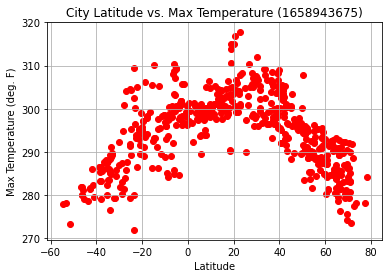

In [9]:
plt.scatter(lat, maxTemp, c="red")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (deg. F)")
plt.grid()
plt.show()

In [26]:
plt.savefig("../Images/lat_vs_maxTemp.png")
print("The above plot shows the latitude position of a city against the maximum temperature of that city in degrees Fahrenheit.")

The above plot shows the latitude position of a city against the maximum temperature of that city in degrees Fahrenheit.


<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

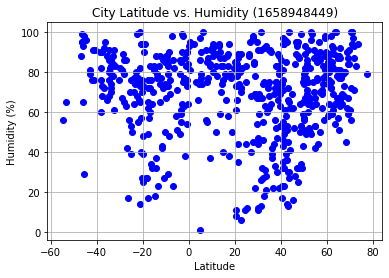

In [27]:
plt.scatter(lat, humid, c="blue")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

In [28]:
plt.savefig("../Images/lat_vs_humidity.png")
print("The above plot shows the latitude position of a city against the percentage humidity of that city.")

The above plot shows the latitude position of a city against the percentage humidity of that city.


<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

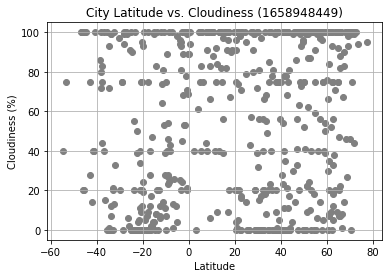

In [29]:
plt.scatter(lat, clouds, c="gray")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

In [30]:
plt.savefig("../Images/lat_vs_cloudiness.png")
print("The above plot shows the latitude position of a city against the percent cloudiness in that city.")

The above plot shows the latitude position of a city against the percent cloudiness in that city.


<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

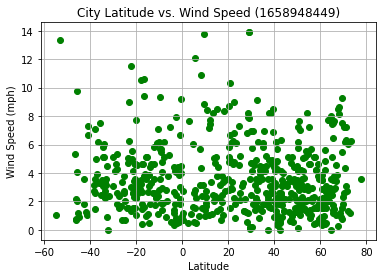

In [31]:
plt.scatter(lat, windspd, c="green")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

In [32]:
plt.savefig("../Images/lat_vs_windSpd.png")
print("The above plot shows the latitude position of a city against the wind speed of that city in miles per hour.")

The above plot shows the latitude position of a city against the wind speed of that city in miles per hour.


<Figure size 432x288 with 0 Axes>

## Linear Regression

In [33]:
posCleanCityData = cleanCityData.loc[cleanCityData["Latitude"]>=0,:]
negCleanCityData = cleanCityData.loc[cleanCityData["Latitude"]<=0,:]
posCleanCityData.head()

,Name,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
1,Pevek,69.7008,170.3133,34.466,91,100,1.82,1658948305
3,Chifeng,42.2683,118.9636,67.874,85,100,0.66,1658948306
4,Srednekolymsk,67.4500,153.6833,40.730,73,83,3.85,1658948306
5,Crestview,30.7621,-86.5705,93.344,59,81,1.79,1658948306
6,Southbridge,42.0751,-72.0334,85.946,51,100,1.79,1658948307


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46529383669924124


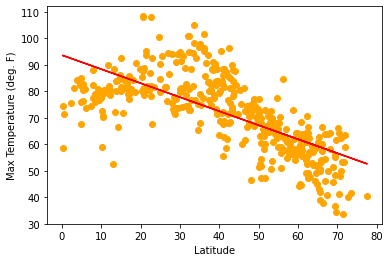

The plot regression describes the relationship between latitude and max temperature; there is a negative correlation because higher latitudes generally correlate to lower maximum temperatures.


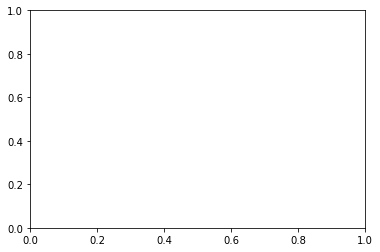

In [35]:
posLat = posCleanCityData["Latitude"]
maxTemp = posCleanCityData["Maximum Temperature"]
x_values = posLat
y_values = maxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="orange")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (deg. F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/poslat_vs_maxtemp.png")
print("The plot regression describes the relationship between latitude and max temperature; there is a negative correlation because higher latitudes generally correlate to lower maximum temperatures.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5653231238264844


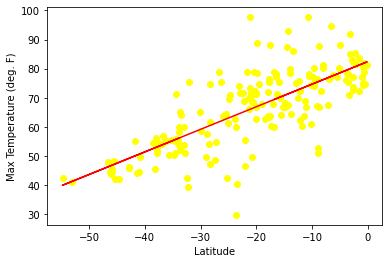

The plot regression describes the relationship between latitude and max temperature; there is a positive correlation because higher latitudes below zero generally correlate to higher maximum temperatures.


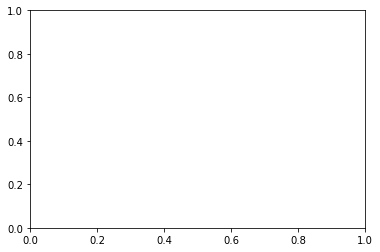

In [36]:
negLat = negCleanCityData["Latitude"]
maxTemp = negCleanCityData["Maximum Temperature"]
x_values = negLat
y_values = maxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="yellow")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (deg. F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/neglat_vs_maxTemp.png")
print("The plot regression describes the relationship between latitude and max temperature; there is a positive correlation because higher latitudes below zero generally correlate to higher maximum temperatures.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005478973277945599


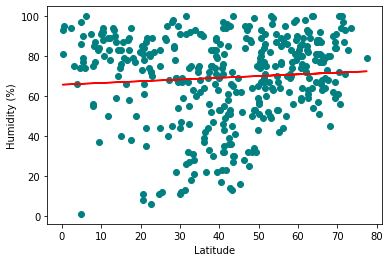

The plot regression describes the relationship between latitude and humidity; there seems to be a slight positive relation for the two.


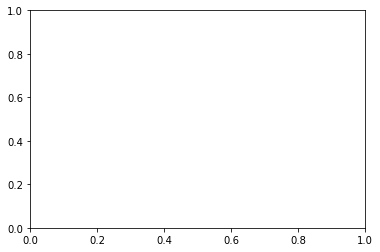

In [46]:
posLat = posCleanCityData["Latitude"]
humidity = posCleanCityData["Humidity"]
x_values = posLat
y_values = humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="teal")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/poslat_vs_humidity.png")
print("The plot regression describes the relationship between latitude and humidity; there seems to be a slight positive relation for the two.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02671509934361093


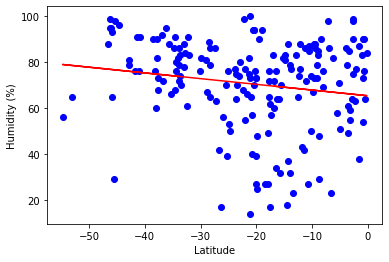

The plot regression describes the relationship between latitude and humidity; there seems to be a negative correlation between latitude below 0 and humidity, so higher latitude corresopnds to lower humidity.


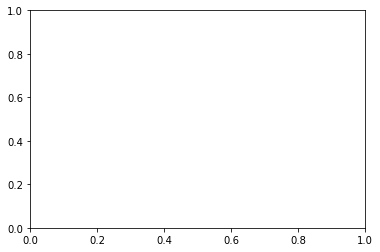

In [38]:
negLat = negCleanCityData["Latitude"]
humidity = negCleanCityData["Humidity"]
x_values = negLat
y_values = humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="blue")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/neglat_vs_Humidities y.png")
print("The plot regression describes the relationship between latitude and humidity; there seems to be a negative correlation between latitude below 0 and humidity, so higher latitude corresopnds to lower humidity.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00010411806382297881


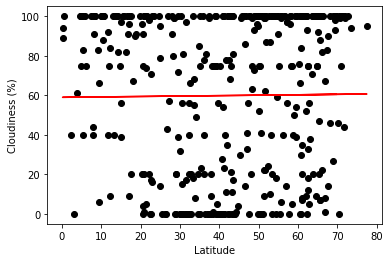

The plot regression describes the relationship between latitude and cloudiness; there appears to be a positive correlation due to the line of best fit, but there truly seems to be no correlation when looking at individual datapoints.


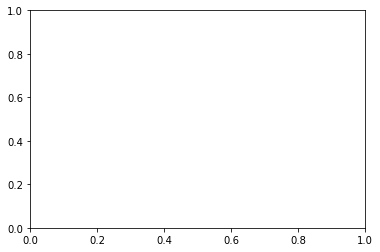

In [40]:
posLat = posCleanCityData["Latitude"]
clouds = posCleanCityData["Cloudiness"]
x_values = posLat
y_values = clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="black")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/poslat_vs_cloud.png")
print("The plot regression describes the relationship between latitude and cloudiness; there appears to be a positive correlation due to the line of best fit, but there truly seems to be no correlation when looking at individual datapoints.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003012251988988949


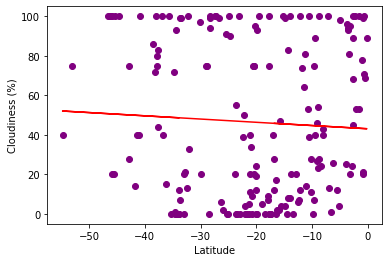

The plot regression describes the relationship between latitude and cloudiness; higher latitude below 0 (less negative) corresponds to less cloudiness.


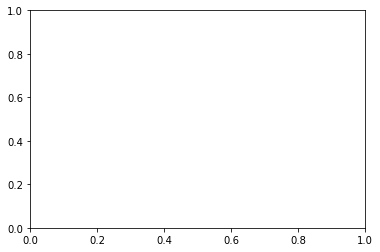

In [42]:
negLat = negCleanCityData["Latitude"]
clouds = negCleanCityData["Cloudiness"]
x_values = negLat
y_values = clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="purple")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/neglat_vs_cloud.png")
print("The plot regression describes the relationship between latitude and cloudiness; higher latitude below 0 (less negative) corresponds to less cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009826556178474355


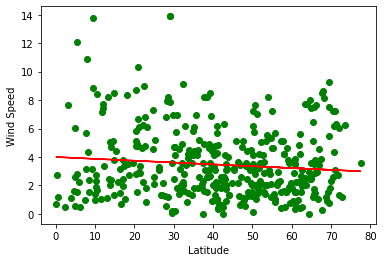

The plot regression describes the relationship between latitude and wind; there appears to be a negative correlation between the two.


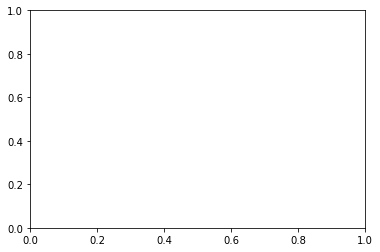

In [44]:
posLat = posCleanCityData["Latitude"]
windspd = posCleanCityData["Wind Speed"]
x_values = posLat
y_values = windspd
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="green")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/poslat_vs_windspd.png")
print("The plot regression describes the relationship between latitude and wind; there appears to be a negative correlation between the two.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001804273367512878


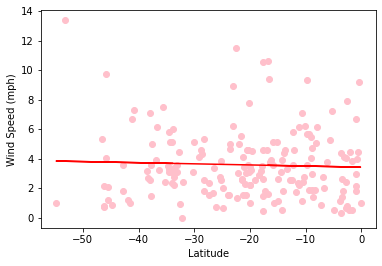

The plot regression describes the relationship between latitude and wind speed; higher latitude below 0 (less negative) tends to have lower humidity.


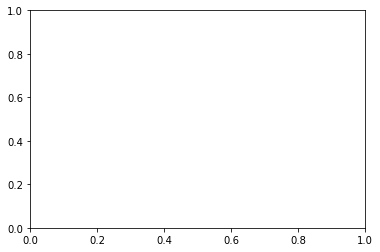

In [45]:
negLat = negCleanCityData["Latitude"]
windspd = negCleanCityData["Wind Speed"]
x_values = negLat
y_values = windspd
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="pink")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("../Images/neglat_vs_windspd.png")
print("The plot regression describes the relationship between latitude and wind speed; higher latitude below 0 (less negative) tends to have lower humidity.")